# Creating the tidal forcing

In [1]:
from roms_tools import Grid

We first create our grid object.

In [2]:
grid = Grid(
    nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-10, center_lat=61, rot=-20
)

Given our grid, our goal is now to create the necessary tidal forcing fields to run a ROMS simulation.

The tidal forcing is based on the TPXO atlas, which sits on perlmutter at the following location.

In [3]:
path = "/global/cfs/projectdirs/m4746/Datasets/TPXO/tpxo9.v2a.nc"

You can also download your own version. For more details, please refer to [this page](https://roms-tools.readthedocs.io/en/latest/datasets.html).

We now create our tidal forcing for a model reference date of January 1st, 2000.

In [4]:
from roms_tools import TidalForcing

In [5]:
from datetime import datetime

In [6]:
model_reference_date = datetime(2000, 1, 1)

In [7]:
%%time

tidal_forcing = TidalForcing(
    grid=grid,
    source={"name": "TPXO", "path": path},
    ntides=10,  # number of constituents to consider <= 14. Default is 10.
    allan_factor=2.0,  # Allan factor. Default is 2.0.
    model_reference_date=model_reference_date,  # Model reference date. Default is January 1, 2000.
    use_dask=False,
)

CPU times: user 2min 29s, sys: 188 ms, total: 2min 29s
Wall time: 5.16 s


To see the values of the tidal forcing variables we can examine the `xarray.Dataset` object returned by the `.ds` property.

In [8]:
tidal_forcing.ds

<xarray.Dataset> Size: 3MB
Dimensions:  (ntides: 10, eta_rho: 102, xi_rho: 102, xi_u: 101, eta_v: 101)
Coordinates:
    omega    (ntides) float64 80B 0.0001405 0.0001454 ... 2.639e-06 5.323e-06
Dimensions without coordinates: ntides, eta_rho, xi_rho, xi_u, eta_v
Data variables:
    ssh_Re   (ntides, eta_rho, xi_rho) float32 416kB 0.3852 0.3942 ... -0.008699
    ssh_Im   (ntides, eta_rho, xi_rho) float32 416kB -0.04321 ... -0.006433
    pot_Re   (ntides, eta_rho, xi_rho) float32 416kB 0.05362 ... -0.000186
    pot_Im   (ntides, eta_rho, xi_rho) float32 416kB 0.06327 ... 0.001759
    u_Re     (ntides, eta_rho, xi_u) float32 412kB -0.01079 ... -0.0009317
    v_Re     (ntides, eta_v, xi_rho) float32 412kB 0.009077 0.01046 ... 0.00533
    u_Im     (ntides, eta_rho, xi_u) float32 412kB 0.02498 0.02469 ... 0.001186
    v_Im     (ntides, eta_v, xi_rho) float32 412kB -0.0005735 ... -0.01266
Attributes:
    title:                 ROMS tidal forcing created by ROMS-Tools
    roms_tools_version:    0.1.dev177
    source:                TPXO
    model_reference_date:  2000-01-01 00:00:00
    allan_factor:          2.0

We can also plot any of the tidal forcing fields via the `.plot` method.

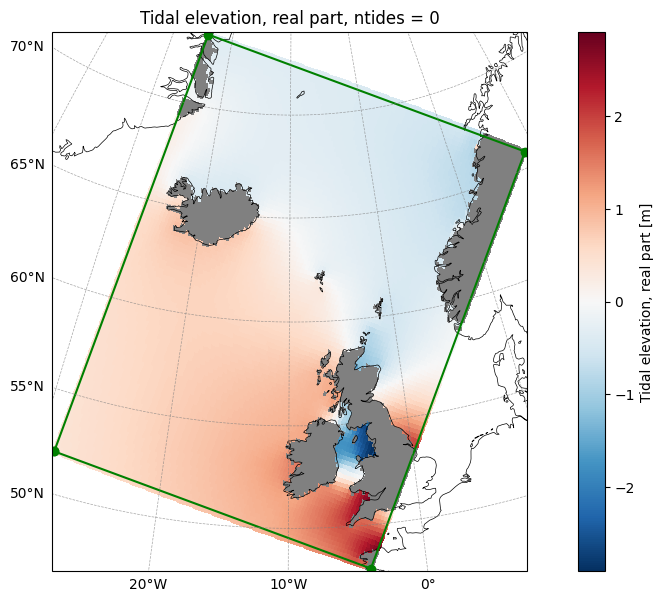

In [9]:
tidal_forcing.plot("ssh_Re", ntides=0)

## Saving as NetCDF or YAML file

Finally, we can save our tidal forcing as a netCDF file via the `.save` method.

In [10]:
filepath = "/pscratch/sd/n/nloose/forcing/my_tidal_forcing.nc"

In [11]:
%time tidal_forcing.save(filepath)

CPU times: user 12.2 ms, sys: 280 ms, total: 293 ms
Wall time: 311 ms


[PosixPath('/pscratch/sd/n/nloose/forcing/my_tidal_forcing.nc')]

We can also export the parameters of our `TidalForcing` object to a YAML file.

In [12]:
yaml_filepath = "/pscratch/sd/n/nloose/forcing/my_tidal_forcing.yaml"

In [13]:
tidal_forcing.to_yaml(yaml_filepath)

In [14]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 0.1.dev177
---
Grid:
  nx: 100
  ny: 100
  size_x: 1800
  size_y: 2400
  center_lon: -10
  center_lat: 61
  rot: -20
  N: 100
  theta_s: 5.0
  theta_b: 2.0
  hc: 300.0
  topography_source:
    name: ETOPO5
  hmin: 5.0
TidalForcing:
  source:
    name: TPXO
    path: /global/cfs/projectdirs/m4746/Datasets/TPXO/tpxo9.v2a.nc
  ntides: 10
  allan_factor: 2.0
  model_reference_date: '2000-01-01T00:00:00'



## Creating tidal forcing from an existing YAML file

In [16]:
%time the_same_tidal_forcing = TidalForcing.from_yaml(yaml_filepath, use_dask=False)

CPU times: user 3min 23s, sys: 170 ms, total: 3min 23s
Wall time: 5.28 s


In [17]:
the_same_tidal_forcing.ds

<xarray.Dataset> Size: 3MB
Dimensions:  (ntides: 10, eta_rho: 102, xi_rho: 102, xi_u: 101, eta_v: 101)
Coordinates:
    omega    (ntides) float64 80B 0.0001405 0.0001454 ... 2.639e-06 5.323e-06
Dimensions without coordinates: ntides, eta_rho, xi_rho, xi_u, eta_v
Data variables:
    ssh_Re   (ntides, eta_rho, xi_rho) float32 416kB 0.3852 0.3942 ... -0.008699
    ssh_Im   (ntides, eta_rho, xi_rho) float32 416kB -0.04321 ... -0.006433
    pot_Re   (ntides, eta_rho, xi_rho) float32 416kB 0.05362 ... -0.000186
    pot_Im   (ntides, eta_rho, xi_rho) float32 416kB 0.06327 ... 0.001759
    u_Re     (ntides, eta_rho, xi_u) float32 412kB -0.01079 ... -0.0009317
    v_Re     (ntides, eta_v, xi_rho) float32 412kB 0.009077 0.01046 ... 0.00533
    u_Im     (ntides, eta_rho, xi_u) float32 412kB 0.02498 0.02469 ... 0.001186
    v_Im     (ntides, eta_v, xi_rho) float32 412kB -0.0005735 ... -0.01266
Attributes:
    title:                 ROMS tidal forcing created by ROMS-Tools
    roms_tools_version:    0.1.dev177
    source:                TPXO
    model_reference_date:  2000-01-01 00:00:00
    allan_factor:          2.0